In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Books.csv' 
books_df = pd.read_csv(file_path)

print("Initial Data Preview:")
print(books_df.head()) # Display the first few rows to understand the dataset structure


# Check the data types and look for any missing values
print("\nData Types and Missing Values:")
print(books_df.info())


Initial Data Preview:
                                         Book_Name Book_Ratting  Book_Price  \
0                                    Sharp Objects         Four       47.82   
1                             In a Dark, Dark Wood          One       19.63   
2                              The Past Never Ends         Four       56.50   
3                                 A Murder in Time          One       16.64   
4  The Murder of Roger Ackroyd (Hercule Poirot #4)         Four       44.10   

  Book_Category  
0       Mystery  
1       Mystery  
2       Mystery  
3       Mystery  
4       Mystery  

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Book_Name      506 non-null    object 
 1   Book_Ratting   506 non-null    object 
 2   Book_Price     506 non-null    float64
 3   Book_Category  506 non-null    obj

## Map Ratings to Numeric Values

In [37]:
rating_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

# Apply the mapping to the 'Book_Ratting' column
books_df['Book_Ratting'] = books_df['Book_Ratting'].map(rating_mapping)

# Handle any missing values after mapping
books_df.dropna(subset=['Book_Ratting'], inplace=True)

books_df['Book_Ratting'] = pd.to_numeric(books_df['Book_Ratting'])
books_df['Book_Category'] = books_df['Book_Category'].astype(str)

# Display cleaned data 
print("\nCleaned Data Preview:")
print(books_df.head())




Cleaned Data Preview:
                                         Book_Name  Book_Ratting  Book_Price  \
0                                    Sharp Objects             4       47.82   
1                             In a Dark, Dark Wood             1       19.63   
2                              The Past Never Ends             4       56.50   
3                                 A Murder in Time             1       16.64   
4  The Murder of Roger Ackroyd (Hercule Poirot #4)             4       44.10   

  Book_Category  
0       Mystery  
1       Mystery  
2       Mystery  
3       Mystery  
4       Mystery  


## Data Cleaning

In [38]:
# Fill missing 'Book_Category' values with a placeholder
books_df['Book_Category'].fillna('Unknown', inplace=True)

# Convert 'Book_Ratting' to numeric (if this conversion step was too aggressive)
books_df['Book_Ratting'] = pd.to_numeric(books_df['Book_Ratting'], errors='coerce')

# Only drop rows where essential columns are missing, but be cautious
books_df.dropna(subset=['Book_Name', 'Book_Ratting'], inplace=True)

# Re-check the DataFrame after cleaning
print(books_df.shape)
print(books_df.head())



(506, 4)
                                         Book_Name  Book_Ratting  Book_Price  \
0                                    Sharp Objects             4       47.82   
1                             In a Dark, Dark Wood             1       19.63   
2                              The Past Never Ends             4       56.50   
3                                 A Murder in Time             1       16.64   
4  The Murder of Roger Ackroyd (Hercule Poirot #4)             4       44.10   

  Book_Category  
0       Mystery  
1       Mystery  
2       Mystery  
3       Mystery  
4       Mystery  


##  Basic Analysis

In [32]:
# Number of books per category (Book_Category)
books_per_category = books_df['Book_Category'].value_counts()

# Average rating per category
average_rating_per_category = books_df.groupby('Book_Category')['Book_Ratting'].mean().sort_values(ascending=False)


## Visualization


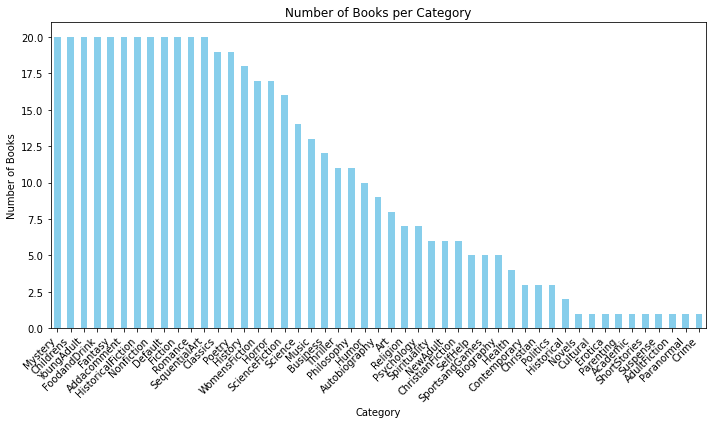

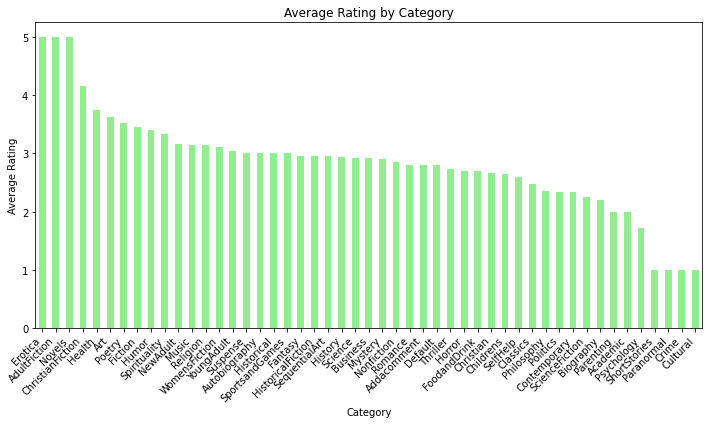

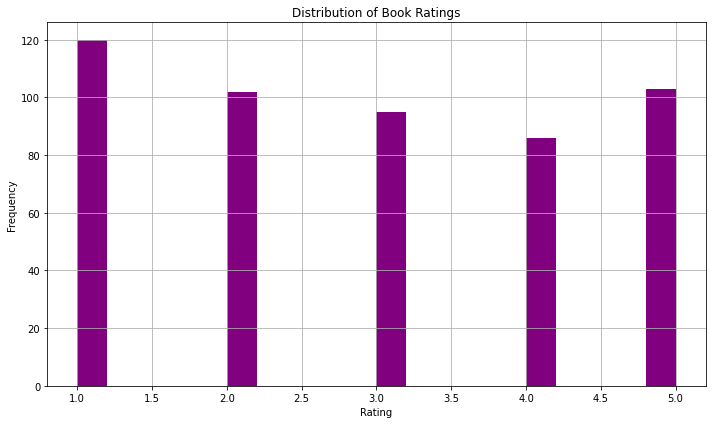

In [33]:
# Step 4: Visualization

# Bar chart for the number of books per category
if not books_per_category.empty:
    plt.figure(figsize=(10, 6))
    books_per_category.plot(kind='bar', color='skyblue')
    plt.title('Number of Books per Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot for 'Number of Books per Category'")

# Bar chart for the average rating by category
if not average_rating_per_category.empty:
    plt.figure(figsize=(10, 6))
    average_rating_per_category.plot(kind='bar', color='lightgreen')
    plt.title('Average Rating by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot for 'Average Rating by Category'")

# Histogram of book ratings
if not books_df['Book_Ratting'].empty:
    plt.figure(figsize=(10, 6))
    books_df['Book_Ratting'].hist(bins=20, color='purple')
    plt.title('Distribution of Book Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot for 'Distribution of Book Ratings'")



## Report

In [34]:
# Report Summary
print("\nSummary of Key Findings:")
print("\n1. Number of Books per Category:")
print(books_per_category)

print("\n2. Average Rating by Category:")
print(average_rating_per_category)


Summary of Key Findings:

1. Number of Books per Category:
Mystery              20
Childrens            20
YoungAdult           20
FoodandDrink         20
Fantasy              20
Addacomment          20
HistoricalFiction    20
Nonfiction           20
Default              20
Fiction              20
Romance              20
SequentialArt        20
Classics             19
Poetry               19
History              18
WomensFiction        17
Horror               17
ScienceFiction       16
Science              14
Music                13
Business             12
Thriller             11
Philosophy           11
Humor                10
Autobiography         9
Art                   8
Religion              7
Psychology            7
Spirituality          6
NewAdult              6
ChristianFiction      6
SelfHelp              5
SportsandGames        5
Biography             5
Health                4
Contemporary          3
Christian             3
Politics              3
Historical            2
Nove